## NUMPY ARRAYS: MODIFICATIONS
  - useful ways to change an array, a, include: 
     - converting from multi-D to 1D
     - reshaping
     - adding elements
     - removing elements
     - reassigning elements
     - combining arrays

### (1) converting from multi-D to 1D: *a.flatten()*

In [2]:
import numpy as np

In [3]:
a = np.array([[5,10,15],[20,25,30]]) # 2D array
print(a)
print("    ")
c = a.flatten() # convert to 1D array!
print(c)

[[ 5 10 15]
 [20 25 30]]
    
[ 5 10 15 20 25 30]


### (2) reshaping: *np.reshape(a, new dims), np.transpose(a)*

In [4]:
print("a =", a) # a is a 2x3 array
print("\n")

c = np.reshape(a,(3,2)) # say we want a 3x2 array
print(c)

a = [[ 5 10 15]
 [20 25 30]]


[[ 5 10]
 [15 20]
 [25 30]]


In [5]:
# If want transposition (switching the row and column indices)
d = np.transpose(a)
print(d)

[[ 5 20]
 [10 25]
 [15 30]]


### (3) adding elements: *np.insert(a, index, element(s))*

In [6]:
a = np.arange(0,10,2)
print("a = ",a)
print("\n")

b = np.insert(a,3,-8) # insert -8 as the fourth element
print(b)
print("\n")
c = np.insert(a,2,[-2,-4]) # insert -2, then -4 beginning as the third element
print(c)

# np.append(array,element(s)) to tack on to the end instead!

a =  [0 2 4 6 8]


[ 0  2  4 -8  6  8]


[ 0  2 -2 -4  4  6  8]


### (4) removing elements: *np.delete(a, index)*

In [7]:
# Let's get rid of the -2 and -4 we just added!
d = np.delete(c,(2,3))
print(d)

[0 2 4 6 8]


### (5)  (re) assigning elements: *a[index] = value*

In [8]:
a = np.arange(0,12,2)
print("a = ",a)
a[2] = 15 # replace the third value with 15
print(a)
a[3:5] = [20,25] # can even replace a range of values! Here, the 4th and 5th
print(a)

a =  [ 0  2  4  6  8 10]
[ 0  2 15  6  8 10]
[ 0  2 15 20 25 10]


### (6)  combining arrays:  *np.concatenate((a,b,...), axis), np.hstack((a,b,...)), np.vstack((a,b,...))*

In [9]:
a = np.array([[1,2,3],[4,5,6]])
print(a,'\n')
b = np.array([[7,8,9],[10,11,12]])
print(b)

[[1 2 3]
 [4 5 6]] 

[[ 7  8  9]
 [10 11 12]]


- #### np.concatenate
  - arrays must have same shape, with the exception of the axis along which combining 

In [10]:
np.concatenate((a,b),axis=0) # Concatenate along rows (axis 0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [11]:
np.concatenate((a,b),axis=1) # Concatenate along columns (axis 1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

- #### np.vstack, np.hstack
  - particularly useful if combining arrays of mixed dimensions
  - arrays must have same shape except along first axis (vstack) or second axis (hstack)

In [12]:
print(a,'\n')  # 2x3 array

b = np.array([7,8,9]) # 1x3 array
print(b)

[[1 2 3]
 [4 5 6]] 

[7 8 9]


In [13]:
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### (7)  merging two 1D arrays into 2D arrays (like coordinate arrays): *np.meshgrid(x, y)*
 - particularly handy for converting two 1D array of x and y coordinates (kilometers, lat/lon, etc.) into two 2D arrays 
 - aka, producing a *rectangular* grid of points needed for many applications with spatial data 

(361,)
(721,)
(361, 721)
(361, 721)


Text(0, 0.5, 'Latitude')

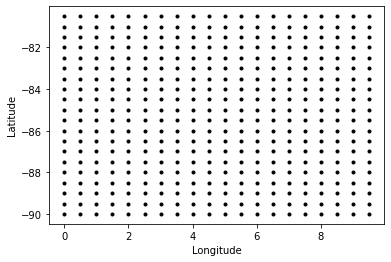

In [16]:
# Meshgrid Example
import matplotlib.pyplot as plt
lat = np.arange(-90,90.5,0.5)
print(np.shape(lat))
lon = np.arange(0,360.5,0.5)
print(np.shape(lon))

xx,yy = np.meshgrid(lon,lat)
print(np.shape(xx))
print(np.shape(yy))

#Let's plot a subset of the grid
plt.plot(xx[0:20,0:20], yy[0:20,0:20], marker='.', color='k', linestyle='none')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## NUMPY ARRAYS, UNIVERSAL FUNCTIONS 
- **universal functions**:  vectorized operations that apply a given operation to each element of the array
    - resulting in another array
<br><br>
- such operations are *implicit* loops, which are more efficient than *explicit* loops (for loops, while loops)
<br><br>
- here's an example of the distinct difference in efficiency:

In [17]:
import time  # time module 

a = np.arange(0,1000000,1) # create an array with a large number of elements

# Time how long it takes to do each type of operation

# First, broadcasting (implicit loop)
start = time.time()
# Add a value to each element of array 
# Via broadcasting - aka an implicit loop!  (Definition later!)
b = a+10 # "+' is a wrapper for np.add function!
time1 = time.time()-start

# Now, explicit loop version of this - one element per each iteration of the loop!
d = np.zeros_like(a)
start = time.time()
for i in range(0,a.size-1):
    d[i] = a[i]+10
time2 = time.time()-start

print('It took the following times to complete the operation these two different ways:')
print('Vectorized operation: ',time1)
print('For loop: ',time2)

It took the following times to complete the operation these two different ways:
Vectorized operation:  0.005105018615722656
For loop:  0.24722790718078613


## NUMPY ARRAYS: BROADCASTING
- broadcasting is another way to help vectorize operations
<br><br>
- broadcasting is a set of rules for using binary universal functions on differently-sized arrays
  - example: adding a scalar to an array, or multiplying an array by a scalar!
  - the scalar is broadcasted (stretched) to each array element 

In [18]:
# Another example of broadcasting
print(a)
f = a*10 # multiplying array a by a scalar
print(f)

[     0      1      2 ... 999997 999998 999999]
[      0      10      20 ... 9999970 9999980 9999990]


## NUMPY ARRAYS: MATH OPERATIONS

In [27]:
import numpy as np
a = np.arange(2,12,2)
b = np.arange(20,30,2)
c = np.arange(-10,0,2)

print(a)
print(b)
print(c)

[ 2  4  6  8 10]
[20 22 24 26 28]
[-10  -8  -6  -4  -2]


In [20]:
# Basic: addition
print(np.add(a,b)) # adding two arrays together
print(a+b) # "+" symbol is a wrapper to np.add! Same result!

[22 26 30 34 38]
[22 26 30 34 38]


In [21]:
# Exponential
np.exp(a) # exponential - e^x

array([7.38905610e+00, 5.45981500e+01, 4.03428793e+02, 2.98095799e+03,
       2.20264658e+04])

In [22]:
# Modulus 
print(np.fmod(a,5)) # use this over '%' if have floats

[2 4 1 3 0]


In [23]:
# Natural logarithm - ln(x)
np.log(a)

array([0.69314718, 1.38629436, 1.79175947, 2.07944154, 2.30258509])

In [24]:
# Value of pi
np.pi

3.141592653589793

In [25]:
# Radians to degrees
angle = 90
angle2 = np.radians(angle) # np.degrees for reverse 
print(angle2)

1.5707963267948966


In [26]:
# Sine 
np.sin(angle2) # angle MUST be in radians!

1.0

In [28]:
# Absolute value
np.fabs(c)

array([10.,  8.,  6.,  4.,  2.])

In [29]:
# Rounding number up to nearest integer
c = np.linspace(0,2,9)
print(c)
np.ceil(c)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


array([0., 1., 1., 1., 1., 2., 2., 2., 2.])

In [30]:
# Rounding number down to nearest integer
np.floor(c)

array([0., 0., 0., 0., 1., 1., 1., 1., 2.])

## NUMPY ARRAYS: LOGICAL & COMPARISON OPERATIONS
### (1) finding elements that meet a certain condition: *np.where(condition)*
  - *result*: array of *index* locations of elements that meet this condition 

In [31]:
a = np.arange(0,24,2)
print('a=',a)

# Single condition
result = np.where(a>10) 
print(a[result]) # to get the actual elements in the array that met the conditions fed into np.where

# Alternative syntax that gives us same result 
print(a[(a>10)]) # (a>10) results in a True/False array; a[the True/False array] will only return
                 # elements that are 'True', i.e., are greater than 10 

a= [ 0  2  4  6  8 10 12 14 16 18 20 22]
[12 14 16 18 20 22]
[12 14 16 18 20 22]


In [33]:
# More complicated conditions
# Can't use np.where(a>10 and a <16)
result = np.where((a>10)*(a<16)) # multiplying conditions together means multiplying Boolean arrays
                                 # True*True= True, and True*False = False, so this is the equivalent of
                                 # requiring that both conditions are met
print(a[result])

[12 14]


### (2) how many elements meet a certain condition?

In [35]:
print(a)
# An additional use for sum!
print(np.sum(a>10))  # Recall that a > 10 results in a Boolean array, so this 
              # function counts the numnber of 'True' in this array!

#Alternatively
np.count_nonzero(a>10)

[ 0  2  4  6  8 10 12 14 16 18 20 22]
6


6

### (3) do any (or all) elements meet a certain condition?

In [36]:
print(a)
# Are there any values greater than 16?
np.any(a>16)  # Yep! 

[ 0  2  4  6  8 10 12 14 16 18 20 22]


True

In [37]:
print(a)
# Are all vales greater than or equal 2?
np.all(a>=2) # Nope!  The first element in the array, 0, is not!

[ 0  2  4  6  8 10 12 14 16 18 20 22]


False